In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
df_train.set_index('Id', inplace=True)
df_test.set_index('Id', inplace=True)
submission.set_index('Id', inplace=True)

df_train_len = len(df_train)
df_test_len = len(df_test)

print(df_test_len)
print(df_train_len)
# set_index를 이용하면 DataFrame의 index를 원하는대로 변경할 수 있음.

1459
1460


In [4]:
# 2. Feature Selection - Variables of Corrleation >= 0.3
# 상관관계 검토
# corr()함수를 통해 dataframe내의 모든 변수간의 상관관계가 0.3이상인 변수만 heatmap 출력

corrmat = df_train.corr()
top_corr_features = corrmat.index[abs(corrmat['SalePrice'])>=0.3]
top_corr_features

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

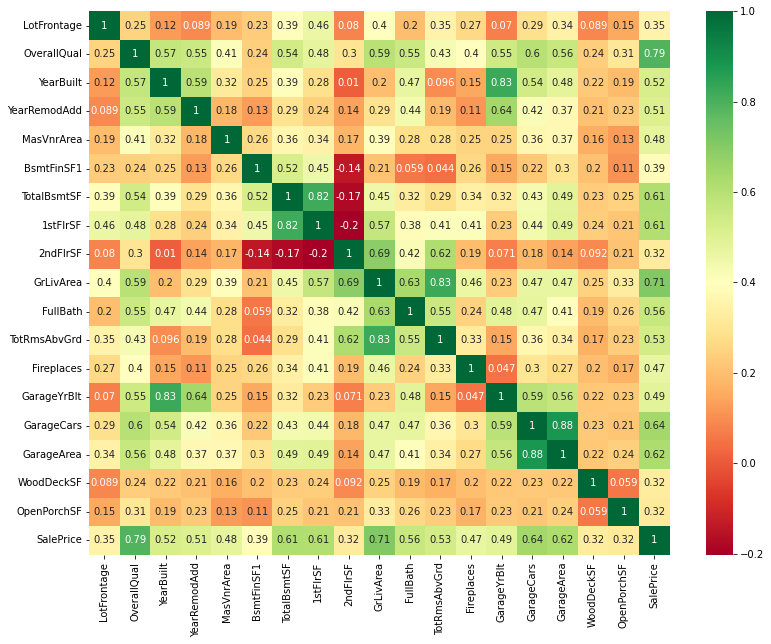

In [5]:
plt.figure(figsize=(13,10))
g = sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [6]:
# feature selection
# df_train = df_train[top_corr_features]
# df_test = df_test[top_corr_features.drop(['SalePrice'])]

In [7]:
y_train = df_train['SalePrice']
df_train = df_train[list(df_test)]
y_train = np.log(y_train+1)

In [8]:
# concat train & test set
# train과 test 셋에 동일한 feature enginering을 적용해주기 위해 두개의 데이터 셋을 하나로 합쳐준다.

all_data = pd.concat((df_train, df_test), axis=0)
print('Length of alldata : ', len(all_data))
all_data.head()

Length of alldata :  2919


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [9]:
# check NaN raio and Remove Null ratio >= 0.5
'''
데이터를 처리할 때 항상 결측값을 어떻게 처리해야할지 고민해야한다.
추후 모델에 입력되는 input값에는 절대 어떠한 Null 값이 있어서는 안되며, 있더라도 에러가 발생하기 때문에 미리 처리를 해줘야한다.
우선 각 칼럼별로 Null 값 비율이 50% 이상인 칼럼을 찾아 해당 칼럼을 제거한다.
보통 결측값 처리를 위해 평균, 최대,최소 값으로 대체하곤 하는데 대부분의 칼럼이 결측치인 데이터는 차라리 없애주는 것이 좋다.
'''

# check null
check_null = all_data.isna().sum() / len(all_data)

# columns of nul ratio >= 0.5
check_null[check_null >= 0.5]

Alley          0.932169
PoolQC         0.996574
Fence          0.804385
MiscFeature    0.964029
dtype: float64

In [10]:
# remove columns of null ratio >= 0.5
remove_cols = check_null[check_null >= 0.5].keys()
all_data = all_data.drop(remove_cols, axis=1)

all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [11]:
# check object & Numeric variables
'''
# 해당 데이터 셋에는 수치형 데이터만 있는 것이 아니라, 카테고리형 데이터도 존재한다.(ex) 성별: 남자, 여자 학급: 햇님반, 꽃님반)
# 이러한 카테고리형 데이터는 각 칼럼을 0과 1로 변환해주는 one-hot encoding을 적용해주어 수치값과 가중치를 달리해주어야 한다.
# 수치형 데이터와 카테고리형 데이터를 구분하기 위해 select_dtypes()이용.
# 파라미터로 include와 exclude를 적용해 데이터를 분리
'''

all_data_obj = all_data.select_dtypes(include='object') # 카테고리형
all_data_num = all_data.select_dtypes(exclude='object') # 수치형

print('Object type columns:\n', all_data_obj.columns)
print('-----------------------------------------------------------------------')
print('Numeric type columns:\n', all_data_num.columns)

Object type columns:
 Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
-----------------------------------------------------------------------
Numeric type columns:
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'B

In [12]:
# Chanhe object type to dummy variables
'''
위에서 분리한 카테고리형 데이터에 one-hot encoding 적용(get_dummies())
'''
all_data_dummy = pd.get_dummies(all_data_obj, drop_first=True)
all_data_dummy.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [13]:
# Impute NaN of numeric data to 'mean'ArithmeticError
'''
# 4번째 과정에서 null값이 50%이상인 변수들을 제거해주었는데, 그 이하로 null 값이 있는 데이터를 마저 처리해주어야한다.
# 여기서는 각 칼럼의 null값을 해당하는 각 변수들의 평균(mean)으로 대체(imputation)해주었다.
'''

all_data_num = all_data_num.fillna(all_data_num.mean())
# 결측 값을 각열의 평균값으로 대체
all_data_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006


In [14]:
# Merge numeric_df & dummies_df
'''
# 위에서 각각 처리한 카테고리형 데이터와 수치형 데이터를 최종적으로 다시 하나로 merge해준다
# merge시 index 순서가 꼬이지 않게 left_index=True, right_index=True를 지정하여 merge 수행
'''

all_data = pd.merge(all_data_dummy, all_data_num, left_index=True, right_index=True)
all_data.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,0,0,...,548.0,0,61,0,0,0,0,0,2,2008
2,0,0,1,0,1,0,0,1,0,0,...,460.0,298,0,0,0,0,0,0,5,2007
3,0,0,1,0,1,0,0,0,0,0,...,608.0,0,42,0,0,0,0,0,9,2008
4,0,0,1,0,1,0,0,0,0,0,...,642.0,0,35,272,0,0,0,0,2,2006
5,0,0,1,0,1,0,0,0,0,0,...,836.0,192,84,0,0,0,0,0,12,2008


In [15]:
X_train = all_data[:df_train_len]
X_test = all_data[df_train_len:]

y_train.head()

Id
1    12.247699
2    12.109016
3    12.317171
4    11.849405
5    12.429220
Name: SalePrice, dtype: float64

In [16]:
X_train['SalePrice'] = y_train
X_train.head()

/tmp/ipykernel_1211269/1594076436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['SalePrice'] = y_train


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,0,0,...,0,61,0,0,0,0,0,2,2008,12.247699
2,0,0,1,0,1,0,0,1,0,0,...,298,0,0,0,0,0,0,5,2007,12.109016
3,0,0,1,0,1,0,0,0,0,0,...,0,42,0,0,0,0,0,9,2008,12.317171
4,0,0,1,0,1,0,0,0,0,0,...,0,35,272,0,0,0,0,2,2006,11.849405
5,0,0,1,0,1,0,0,0,0,0,...,192,84,0,0,0,0,0,12,2008,12.429220


In [17]:
from pycaret.regression import *

In [18]:
reg = setup(X_train, target='SalePrice', train_size=0.8)

,Description,Value
0,session_id,7391
1,Target,SalePrice
2,Original Data,"(1460, 237)"
3,Missing Values,False
4,Numeric Features,221
5,Categorical Features,15
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1168, 362)"


In [19]:
best_model = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.0946,0.0196,0.1392,0.8753,0.0108,0.0079,0.1060
lightgbm,Light Gradient Boosting Machine,0.0951,0.0202,0.1408,0.8723,0.0109,0.0080,0.0370
br,Bayesian Ridge,0.0920,0.0230,0.1466,0.8535,0.0112,0.0077,0.0300
rf,Random Forest Regressor,0.1009,0.0231,0.1506,0.8539,0.0117,0.0084,0.2410
ridge,Ridge Regression,0.0947,0.0244,0.1513,0.8449,0.0116,0.0079,0.0130
omp,Orthogonal Matching Pursuit,0.0980,0.0306,0.1672,0.8062,0.0128,0.0082,0.0080
et,Extra Trees Regressor,0.1116,0.0286,0.1681,0.8185,0.0131,0.0094,0.2630
lr,Linear Regression,0.1082,0.0350,0.1814,0.7755,0.0139,0.0091,0.2210
ada,AdaBoost Regressor,0.1442,0.0356,0.1883,0.7708,0.0146,0.0120,0.0900
en,Elastic Net,0.1204,0.0402,0.1924,0.7412,0.0146,0.0101,0.0130


In [24]:
gbr = create_model('gbr', cross_validation=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0961,0.0171,0.1309,0.8958,0.0102,0.008


In [27]:
tuned_gbr = tune_model(gbr, optimize='RMSE', n_iter=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0748,0.0094,0.0968,0.9274,0.0073,0.0061
1,0.1011,0.0201,0.1419,0.8802,0.0111,0.0085
2,0.0828,0.0142,0.1193,0.8913,0.0095,0.0070
3,0.0984,0.0239,0.1546,0.8442,0.0122,0.0083
4,0.0906,0.0144,0.1201,0.9112,0.0093,0.0076
5,0.0877,0.0151,0.1227,0.8982,0.0094,0.0073
6,0.0903,0.0163,0.1276,0.8890,0.0100,0.0076
7,0.0957,0.0194,0.1393,0.8835,0.0105,0.0079
8,0.1108,0.0326,0.1806,0.8324,0.0140,0.0094


In [28]:
final_model = finalize_model(tuned_gbr)

In [29]:
prediction_gbr = predict_model(final_model, data=X_test)

In [30]:
prediction_gbr.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Label
Id,,,,,,,,,,,,,,,,,,,,,
1461,0,1,0,0,1,0,0,1,0,0,...,140,0,0,0,120,0,0,6,2010,11.738664
1462,0,0,1,0,1,0,0,0,0,0,...,393,36,0,0,0,0,12500,6,2010,11.926036
1463,0,0,1,0,1,0,0,0,0,0,...,212,34,0,0,0,0,0,3,2010,12.145305
1464,0,0,1,0,1,0,0,0,0,0,...,360,36,0,0,0,0,0,6,2010,12.195071
1465,0,0,1,0,1,0,0,0,1,0,...,0,82,0,0,144,0,0,1,2010,12.118487


In [31]:
prediction_gbr['Label']

Id
1461    11.738664
1462    11.926036
1463    12.145305
1464    12.195071
1465    12.118487
          ...    
2915    11.293550
2916    11.349839
2917    12.001519
2918    11.663094
2919    12.360100
Name: Label, Length: 1459, dtype: float64

In [32]:
fin_prediction = np.exp(prediction_gbr['Label']) - 1

In [33]:
fin_prediction.head

<bound method NDFrame.head of Id
1461    125323.738087
1462    151150.241983
1463    188207.389423
1464    197810.684272
1465    183227.028129
            ...      
2915     80301.038940
2916     84950.770112
2917    163001.258399
2918    116201.985947
2919    233303.664623
Name: Label, Length: 1459, dtype: float64>

In [34]:
submission['SalePrice'] = fin_prediction
submission.to_csv('gbr_prediction.csv')

# score 0.13368 (1,293/4,425)